## Reading an OdT seismic volume

Export the data from OdT with **Survey > Export > Seismics > Simple file > 3D**

<img src="../data/OpendTect_horizon.png" />

In [4]:
import numpy as np

In [5]:
with open('../data/OpendTect_seismic_w_header.txt') as f:
    raw = f.readlines()

for l in raw[:3]:
    print(l)

500	4	251

500	800	4010	2017	-2906	-3810	-574	-67	111	2478	161	-3715	-23	4081	1502	-839	-1140	-1389	1691	2517	-4329	-6591	137	2067	-1882	17	6058	5556	-1640	-4788	-234	353	-6036	-3770	6272	5767	-297	2328	3853	-2052	-3509	-1098	-2676	-2200	2465	3038	-388	-2323	-1199	2789	4538	-150	-4094	-1897	554	683	1461	1556	-107	-549	639	1093	127	-1069	-1343	-1337	-1765	-1351	148	978	562	-718	-1560	-88	1567	95	-1701	-509	1154	1102	327	-440	-230	770	313	-285	1736	2890	-26	-2190	-443	708	-909	-1602	-430	-7	428	2917	4634	1716	-3368	-4049	542	3138	-436	-3346	-303	1879	-1513	-3469	-759	162	-1730	-1244	558	862	2528	5111	3048	-2938	-5942	-2792	3402	5929	1410	-3193	-60	5355	3403	-2902	-4891	-2914	-1999	-1045	2166	3105	-1211	-4331	-1775	1090	378	-991	-1379	-1105	399	2348	3768	3853	941	-2149	-280	2832	1455	-946	-874	-78	1399	2064	-817	-2932	-1238	-12	894	3102	1488	-2868	-2743	-1172	-2787	-3042	-116	1914	1522	-1225	-3759	-2090	529	394	1867	3709	-832	-5309	-982	4119	3107	2439	4313	2441	-2228	-2061	2481	3273	-962	

In [6]:
header = raw.pop(0).split()

In [7]:
len(header)

3

In [8]:
import os, gzip

def read_odt_seismic(filename, start_time=None, sample_interval=None):
    """
    Read an ascii seismic volume from OdT.
    
    Returns a timebase, arrays representing inline and xline numbers,
    and an array of data.
    
    """
    # Sniff file compression.
    file_extension = os.path.splitext(filename)[1]
    
    if file_extension[-2:] == 'gz':
        with gzip.open(filename, 'rb') as f:
            raw = f.readlines()
    else:
        with open(filename, 'r') as f:
            raw = f.readlines()

    # Sniff for a header.
    if len(raw[0].split()) == 3:
        s, i, n = raw.pop(0).split()
        start_time, sample_interval, number_samples = float(s), float(i), float(n)

    # Gather the data.
    inlines, xlines, traces = [], [], []

    for line in raw:
        l = line.split()
        inlines.append(int(l.pop(0)))
        xlines.append(int(l.pop(0)))
        trace = np.loadtxt(l)
        traces.append(trace)

    # Prepare everything for return.
    number_inlines = max(inlines) - min(inlines) + 1
    number_xlines = max(xlines) - min(xlines) + 1
    number_samples = len(traces[0])  # Nevermind what the header said
    
    if start_time and sample_interval:
        end_time = start_time + (number_samples-1)*sample_interval
        time_basis = np.linspace(start_time, end_time, number_samples)
    else:
        time_basis = None
    
    data = np.array(traces)
    data = np.reshape(data, (number_inlines, number_xlines, number_samples))

    return time_basis, np.array(inlines), np.array(xlines), data

In [10]:
t, i, x, data = read_odt_seismic("../data/OpendTect_seismic_w_header.txt.gz", 500, 4)

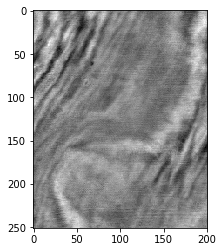

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(data[..., 100], cmap='gray')
plt.show()

In [12]:
t

array([  500.,   504.,   508.,   512.,   516.,   520.,   524.,   528.,
         532.,   536.,   540.,   544.,   548.,   552.,   556.,   560.,
         564.,   568.,   572.,   576.,   580.,   584.,   588.,   592.,
         596.,   600.,   604.,   608.,   612.,   616.,   620.,   624.,
         628.,   632.,   636.,   640.,   644.,   648.,   652.,   656.,
         660.,   664.,   668.,   672.,   676.,   680.,   684.,   688.,
         692.,   696.,   700.,   704.,   708.,   712.,   716.,   720.,
         724.,   728.,   732.,   736.,   740.,   744.,   748.,   752.,
         756.,   760.,   764.,   768.,   772.,   776.,   780.,   784.,
         788.,   792.,   796.,   800.,   804.,   808.,   812.,   816.,
         820.,   824.,   828.,   832.,   836.,   840.,   844.,   848.,
         852.,   856.,   860.,   864.,   868.,   872.,   876.,   880.,
         884.,   888.,   892.,   896.,   900.,   904.,   908.,   912.,
         916.,   920.,   924.,   928.,   932.,   936.,   940.,   944.,
      

In [ ]:
# import h5py
# h5f = h5py.File('../data/seismic.h5', 'w')
# h5f.create_dataset('data', data=data, compression='lzf')
# h5f.create_dataset('time', data=t, compression='lzf')
# h5f.close()